# Mapping Bloomington Residents

In [163]:
import pandas as pd
import numpy as np
import altair as alt
import datetime
import calendar
from vega_datasets import data as vega_data

# Altair has a 5,000 row limit that must be disabled.
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Utility Functions

In [164]:
# Create an array of dataset names
dataset_names = np.array(['visits_01_2019', 'visits_02_2019', 'visits_03_2019', 'visits_04_2019', 'visits_01_2020', 'visits_02_2020', 'visits_03_2020', 'visits_04_2020'])
#dataset_names = ['visits_01_2019', 'visits_02_2019']
datasets = []
maps = []

In [165]:
# Get an array of the Transient CBGs for Bloomington and convert them each to strings
# We will use this array repeatedly
transient_df = pd.read_csv('bton_transient_cbgs.csv')
transient_df.census_block_group = transient_df.census_block_group.astype(str)
transient_df.dtypes
transient = transient_df.census_block_group.to_numpy()

In [166]:
# Function to rename columns from the output
def rename_columns(df):
    # Rename the columns
    data = df.rename(columns={
        'x181050002011_visits' : '181050002011',
        'x181050002012_visits' : '181050002012',
        'x181050002013_visits' : '181050002013',
        'x181050002021_visits' : '181050002021',
        'x181050002022_visits' : '181050002022',
        'x181050003014_visits' : '181050003014',
        'x181050003021_visits' : '181050003021',
        'x181050007003_visits' : '181050007003',
        'x181050012002_visits' : '181050012002',
        'x181050012005_visits' : '181050012005',
        'x181050013014_visits' : '181050013014',
        'x181050014012_visits' : '181050014012',
        'x181050016001_visits' : '181050016001',
        'x181050016002_visits' : '181050016002',
        'x181050016003_visits' : '181050016003',
    })
    return data

# Load & Clean Data

In [167]:
for dataset in dataset_names:
    df = pd.read_csv('bloomington_transient_' + dataset + '.csv')
    df2 = rename_columns(df)
    
    # Get rid of NaNs
    df2 = df2.fillna(0)
    
    # Convert visit columns to int
    for cbg in transient:
        df2[cbg] = df2[cbg].astype(int)
        
    # Add a column that has the summed number of visits by transient residents
    df2['total_visits'] = df2[transient].sum(axis=1)
        
    datasets.append(df2)

print('You have ' + str(len(datasets)) + ' datasets ready to go.')

You have 8 datasets ready to go.


# Mapping Functions

In [168]:
# Function to extract the date of visits and create a title for the map
def get_title(data):
    start_date = pd.to_datetime(data.iloc[0].date_range_start)
    return str(calendar.month_name[start_date.month]) + " " + str(start_date.year)

In [169]:
# Function to create a map for a specific dataset
def visit_map(data):
    map_title = get_title(data)
    map = alt.Chart(data).mark_circle(size=2).encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.value('red'),
        size=alt.Size('total_visits:Q'),
        tooltip='location_name:N'
    ).project(
        type='albersUsa'
    ).properties(
        title=map_title,
        width=800,
        height=500,
    )
    return map

In [170]:
# Create an array of maps for each month
for dataset in datasets:
    map = visit_map(dataset)
    maps.append(map)

# Display Maps

In [171]:
states = alt.topo_feature(vega_data.us_10m.url, 'states')

# EXAMPLE: https://altair-viz.github.io/gallery/us_state_capitals.html
# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=400
).project('albersUsa')

In [172]:
#alt.vconcat((background+maps[0]))

In [173]:
#alt.vconcat((background+maps[1]))

In [174]:
#alt.vconcat((background+maps[2]))

In [175]:
#alt.vconcat((background+maps[3]))

In [176]:
#alt.vconcat((background+maps[4]))

In [177]:
#alt.vconcat((background+maps[5]))

In [178]:
#alt.vconcat((background+maps[6]))

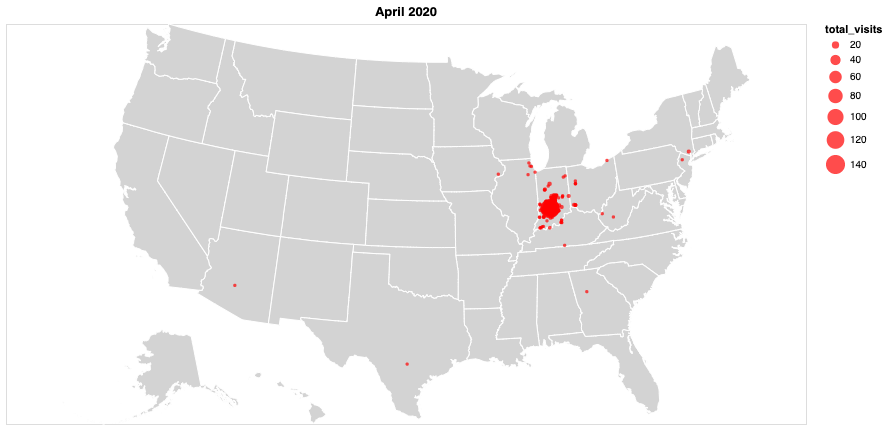

In [179]:
alt.vconcat((background+maps[7]))